神经网络:
训练集平均绝对百分比误差:0.372
测试集平均绝对百分比误差:0.355
平均绝对误差: 14.381890311586748
r2_score -0.46905386471037525


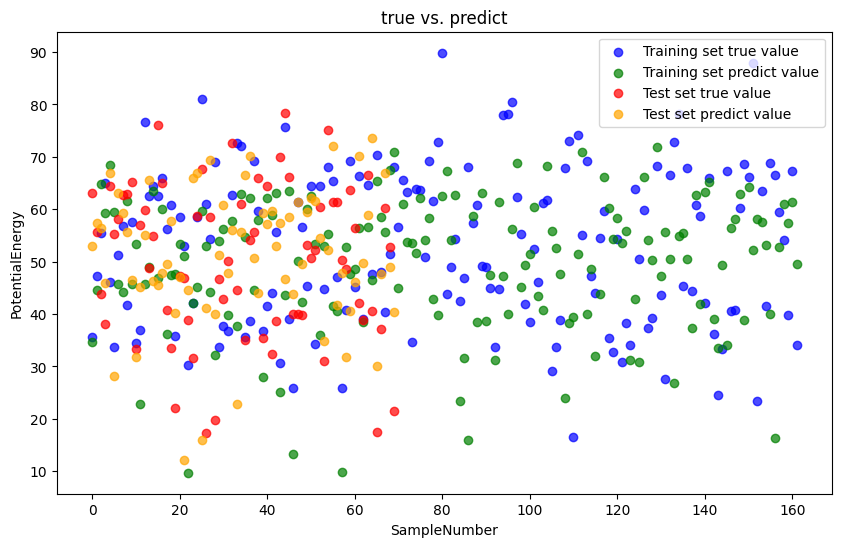


线性回归:
训练集平均绝对百分比误差:0.172
测试集平均绝对百分比误差:0.247
平均绝对误差: 11.156623129886501
r2_score 0.011818313985726747


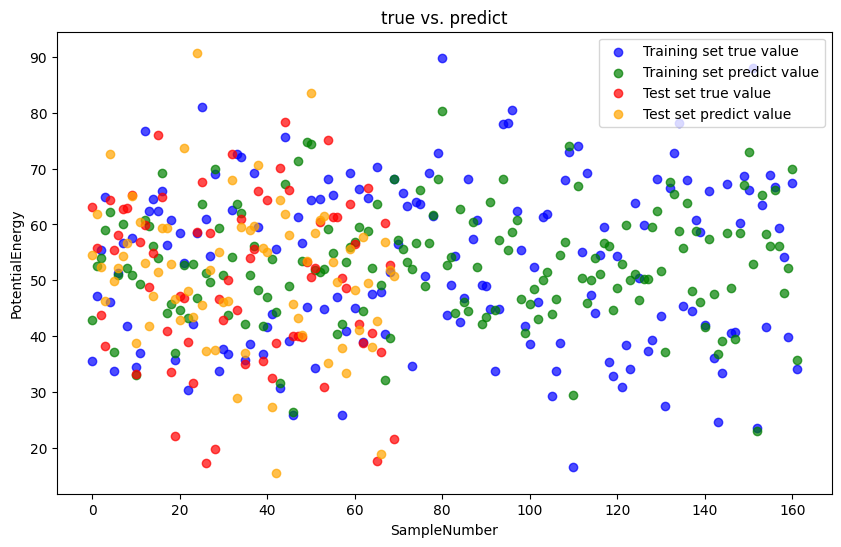


决策树回归:
训练集平均绝对百分比误差:0.000
测试集平均绝对百分比误差:0.295
平均绝对误差: 12.301083673274666
r2_score -0.2552552144955502


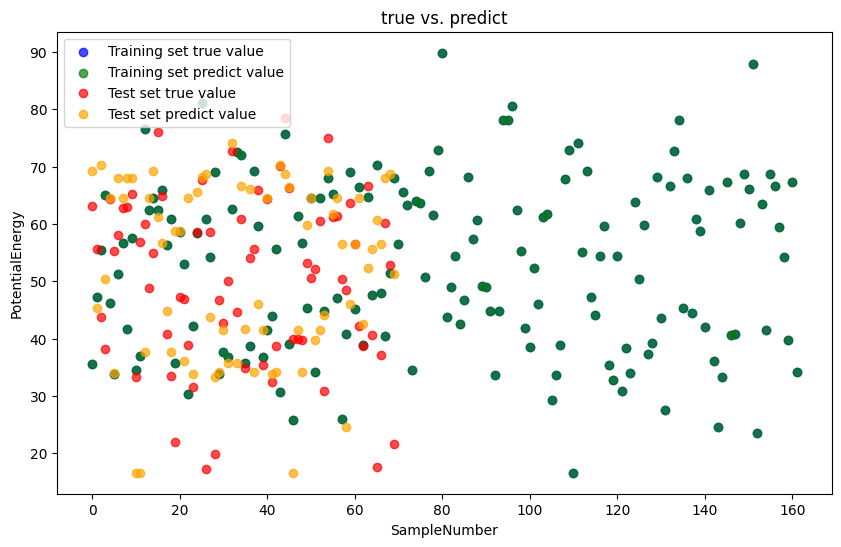


随机森林回归:
训练集平均绝对百分比误差:0.068
测试集平均绝对百分比误差:0.189
平均绝对误差: 9.376881966329828
r2_score 0.34297778689506775


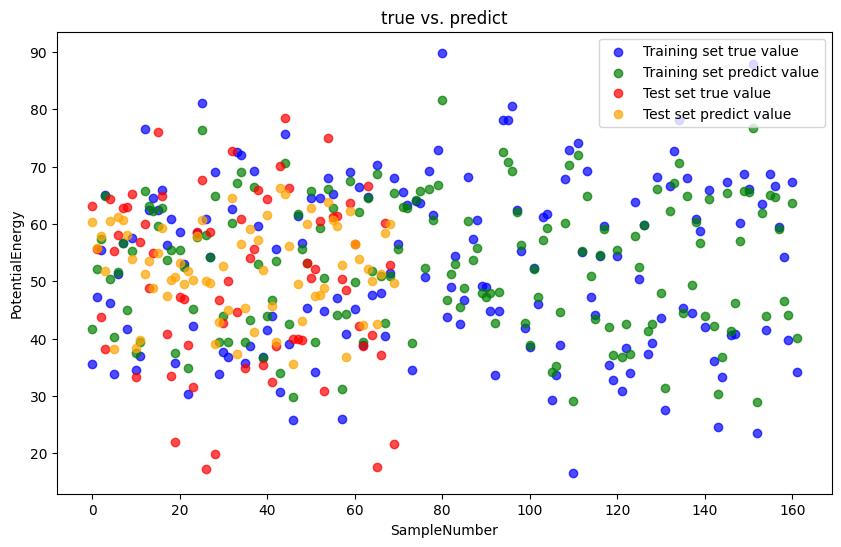


Adaboost回归:
训练集平均绝对百分比误差:0.133
测试集平均绝对百分比误差:0.186
平均绝对误差: 9.093093531250805
r2_score 0.41935087360248535


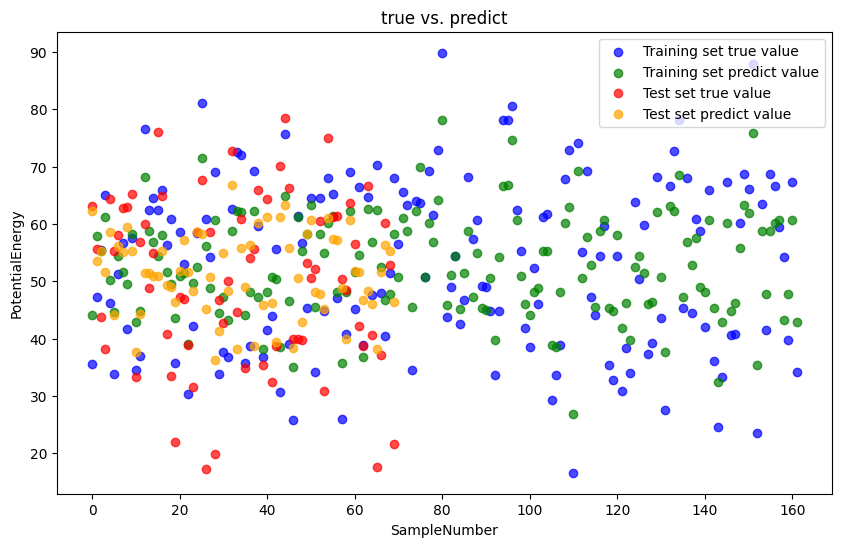


GBDT回归:
训练集平均绝对百分比误差:0.057
测试集平均绝对百分比误差:0.062
平均绝对误差: 2.8069758661364452
r2_score 0.9413401403518161


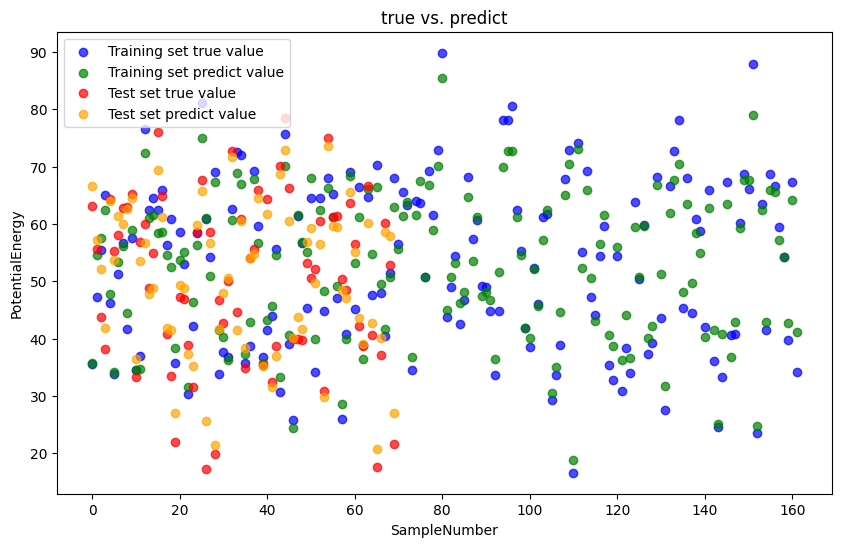


xgboost回归:
训练集平均绝对百分比误差:0.000
测试集平均绝对百分比误差:0.000
平均绝对误差: 0.003813583307976996
r2_score 0.9999998494400377


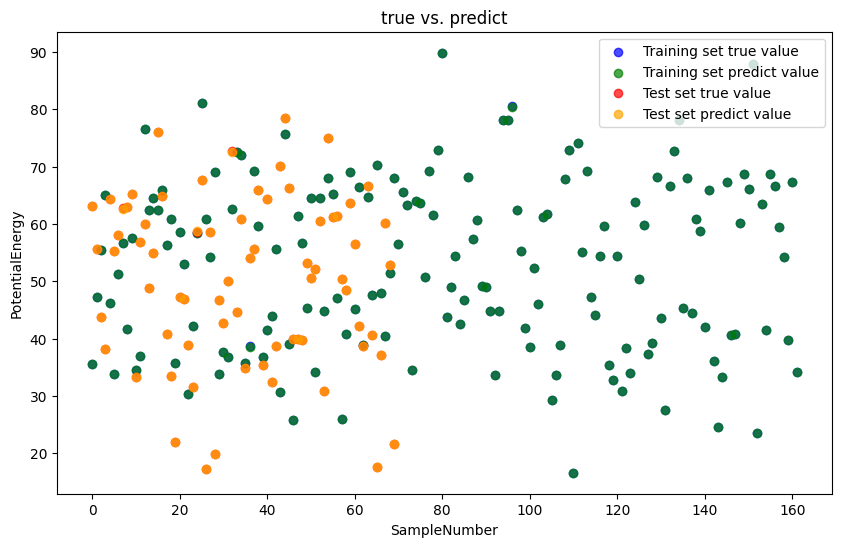

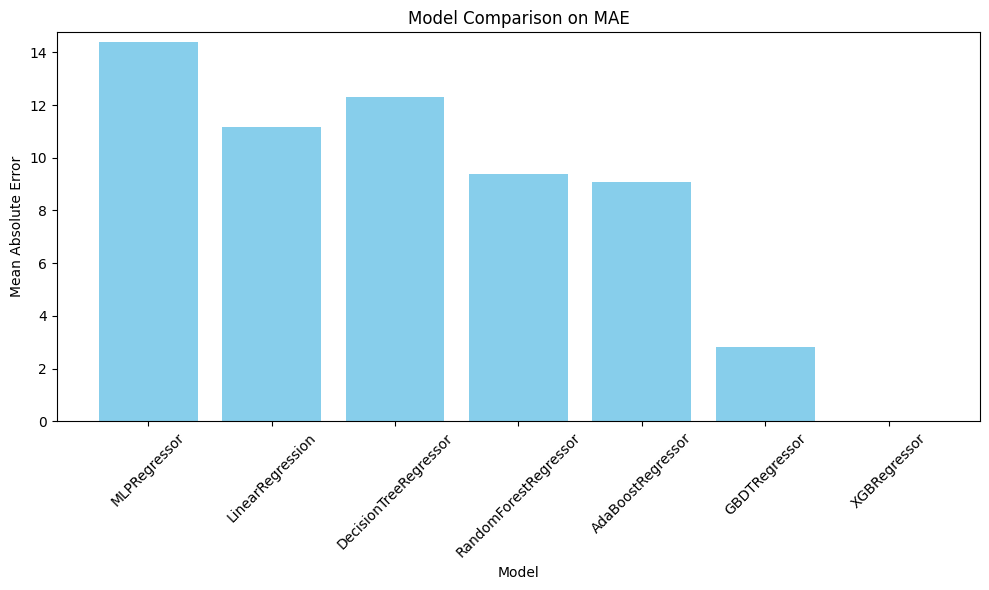

In [1]:
import pandas as pd

# 加载数据
file_path = "american_clean_data.csv"
df = pd.read_csv(file_path)

# 确保match_id是您想分析的比赛ID
specific_match_id = "2023-usopen-1107"
match_data = df[df['match_id'] == specific_match_id].copy()

# 对分类变量应用独热编码
temp1 = pd.get_dummies(match_data[['p1_score','p2_score','winner_shot_type','serve_width','serve_depth']])

# 选择其余的数值特征
temp2 = match_data[['set_no', 'game_no', 'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'server', 'serve_no', 'point_victor', 'p1_points_won', 'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace', 'p1_winner', 'p2_winner', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt', 'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed', 'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run', 'rally_count', 'speed_mph']]

# 合并temp1和temp2为机器学习的特征集X
X = pd.concat([temp1, temp2], axis=1)


# data = pd.read_csv('yang_fianl_1.csv')  # 替换为您的文件路径
# Y = data['p1_momentum_combined']

swing_data = pd.read_csv('american_1107_match_swing.csv')  # 替换为您的文件路径
Y = swing_data['p1_swing']

# 此处所引入的包大部分为下文机器学习算法
import pandas as pd
from numpy import *
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import xgboost as xgb

from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor

import warnings

warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual))

mae_scores = {}
# %%
tr_x, te_x, tr_y, te_y = train_test_split(X, Y, test_size=0.3, random_state=5)
# %%


model = MLPRegressor(hidden_layer_sizes=10, max_iter=1000).fit(tr_x, tr_y)
y_pred = model.predict(te_x)

print("神经网络:")
print("训练集平均绝对百分比误差:{:.3f}".format(mape(model.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(model.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
mae_scores['MLPRegressor'] = mean_absolute_error(te_y, model.predict(te_x))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = model.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = model.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

print("\n线性回归:")
logreg = LinearRegression()
logreg.fit(tr_x, tr_y)
y_pred = logreg.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
mae_scores['LinearRegression'] = mean_absolute_error(te_y, logreg.predict(te_x))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = logreg.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = logreg.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

print("\n决策树回归:")
tree = DecisionTreeRegressor(max_depth=50, random_state=0)
tree.fit(tr_x, tr_y)
y_pred = tree.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
mae_scores['DecisionTreeRegressor'] = mean_absolute_error(te_y, tree.predict(te_x))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = tree.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = tree.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

print("\n随机森林回归:")
rf = RandomForestRegressor()
rf.fit(tr_x, tr_y)

y_pred = rf.predict(te_x)

print("训练集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
mae_scores['RandomForestRegressor'] = mean_absolute_error(te_y, rf.predict(te_x))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = rf.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = rf.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

# print("\nLGBM回归:")
# lgb_model=lgb.LGBMRegressor()
# lgb_model.fit(tr_x,tr_y)
# y_pred = lgb_model.predict(te_x)
# print("训练集平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(tr_x),tr_y)))
# print("测试集平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(te_x),te_y)))
# print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
# print("r2_score",r2_score(te_y,y_pred))
# 
# # 真实值与拟合值的对比图
# plt.figure(figsize=(10, 6))
# 
# # 训练集
# tr_y_pred = lgb_model.predict(tr_x)
# plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
# plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)
# 
# # 测试集
# te_y_pred = lgb_model.predict(te_x)
# plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
# plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)
# 
# 
# # 为图添加标题和图例
# plt.title('真实值 vs. 预测值')
# plt.xlabel('样本序号')
# plt.ylabel('综合得分')
# plt.legend()
# # 显示图形
# plt.show()

print("\nAdaboost回归:")
# 构建Adaboost回归模型
ada_model = AdaBoostRegressor(n_estimators=100)
ada_model.fit(tr_x, tr_y)
y_pred = ada_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(ada_model.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(ada_model.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
mae_scores['AdaBoostRegressor'] = mean_absolute_error(te_y, ada_model.predict(te_x))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = ada_model.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = ada_model.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

print("\nGBDT回归:")
# 构建GBDT回归模型
gbdt_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(X, Y)
y_pred = gbdt_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(gbdt_model.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(gbdt_model.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
mae_scores['GBDTRegressor'] = mean_absolute_error(te_y, gbdt_model.predict(te_x))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = gbdt_model.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = gbdt_model.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

print("\nxgboost回归:")
# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X, Y)

y_pred = xgb_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
mae_scores['XGBRegressor'] = mean_absolute_error(te_y, xgb_model.predict(te_x))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = xgb_model.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = xgb_model.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

# %%
# print("\nxgboost回归:")
# # 构建xgboost回归模型
# xgb_model = xgb.XGBRegressor(n_estimators=31, max_depth=6)
# xgb_model.fit(X, Y)
# y_pred = xgb_model.predict(X)
# print("训练集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(X), y_pred)))
# print("平均绝对误差:", mean_absolute_error(Y, y_pred))
# print("r2_score", r2_score(Y, y_pred))
# 
# plt.figure(figsize=(10, 6))
# 
# # 训练集
# tr_y_pred = xgb_model.predict(tr_x)
# plt.scatter(list(range(X.shape[0])), Y, color='blue', label=' true', alpha=0.7)
# plt.scatter(list(range(X.shape[0])), y_pred, color='green', label='predict', alpha=0.7)
# 
# # 为图添加标题和图例
# plt.title('true vs. predict')
# plt.xlabel('SampleNumber')
# plt.ylabel('PotentialEnergy')
# plt.legend()
# # 显示图形
# plt.show()

# 绘制MAE比较图，但截断纵轴以便更好地比较较小的MAE
plt.figure(figsize=(10, 6))
plt.bar(mae_scores.keys(), mae_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.title('Model Comparison on MAE')
plt.tight_layout()  # 调整布局防止标签重叠

# 设置y轴的范围，例如从0到最大误差的某个百分比
# 这里假设我们将最大误差设为所有MAE中的第二大值的1.2倍
max_mae = sorted(mae_scores.values())[-2]  # 找到第二大的MAE
plt.ylim(0, max_mae * 1.2)

plt.show()



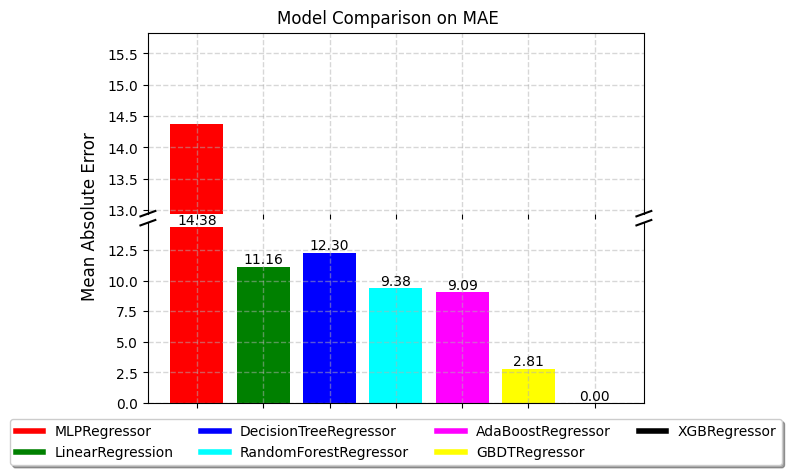

In [2]:
import matplotlib.pyplot as plt


# 指定颜色列表，每个模型一个颜色
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black']

# 找到最大MAE以外的第二大MAE
sorted_mae = sorted(mae_scores.values())
max_mae = sorted_mae[-1]  # 最大的MAE
second_max_mae = sorted_mae[-2]  # 最大MAE以外的第二大MAE

# 创建两个绘图坐标轴；调整两个轴之间的距离，即轴断点距离
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# 第一个子图画出所有模型的MAE，但只关注最大的误差
ax1.bar(mae_scores.keys(), mae_scores.values(), color=colors)
ax1.set_ylim(max_mae - max_mae*0.1, max_mae + max_mae*0.1)  # 只显示最大的outlier
ax1.spines.bottom.set_visible(False)
ax1.tick_params(labeltop=False)  # 隐藏上轴的标签

# 第二个子图画出所有模型的MAE，但只关注主要的数据范围
ax2.bar(mae_scores.keys(), mae_scores.values(), color=colors)
ax2.set_ylim(0, second_max_mae * 1.2)  # 显示大部分数据
ax2.spines.top.set_visible(False)

# 添加网格线
ax1.grid(ls='--', alpha=0.5, linewidth=1)
ax2.grid(ls='--', alpha=0.5, linewidth=1)

# 添加断轴标志（斜线）
d = .015  # 斜线的长度
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left 斜线
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right 斜线
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left 斜线
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right 斜线

# 隐藏x轴的刻度标签
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

# 在每个柱体顶部标注数据
for i, (model, score) in enumerate(mae_scores.items()):
    if score < (second_max_mae * 1.2):
        ax2.text(i, score, f'{score:.2f}', ha='center', va='bottom')
    else:
        ax1.text(i, score, f'{score:.2e}', ha='center', va='bottom')

# 设置y轴标签和图表标题
ax2.set_ylabel('Mean Absolute Error')
fig.suptitle('Model Comparison on MAE', y=0.93)

ax2.set_ylabel('')

# 使用fig添加整个图形的中央Y轴标签
fig.text(0.02, 0.5, 'Mean Absolute Error', va='center', rotation='vertical', fontsize=12)

model_color_mapping = {
    'MLPRegressor': 'red', 
    'LinearRegression': 'green', 
    'DecisionTreeRegressor': 'blue', 
    'RandomForestRegressor': 'cyan', 
    'AdaBoostRegressor': 'magenta', 
    'GBDTRegressor': 'yellow', 
    'XGBRegressor': 'black'
}

# 创建自定义图例
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=model_color_mapping[model], lw=4)
                for model in model_color_mapping]

# 将自定义图例添加到图表中
ax2.legend(custom_lines, model_color_mapping.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=4)

# 显示图形
plt.show()



xgboost回归:
训练集平均绝对百分比误差:0.000
平均绝对误差: 0.40421867585080085
r2_score 0.9985389679514006


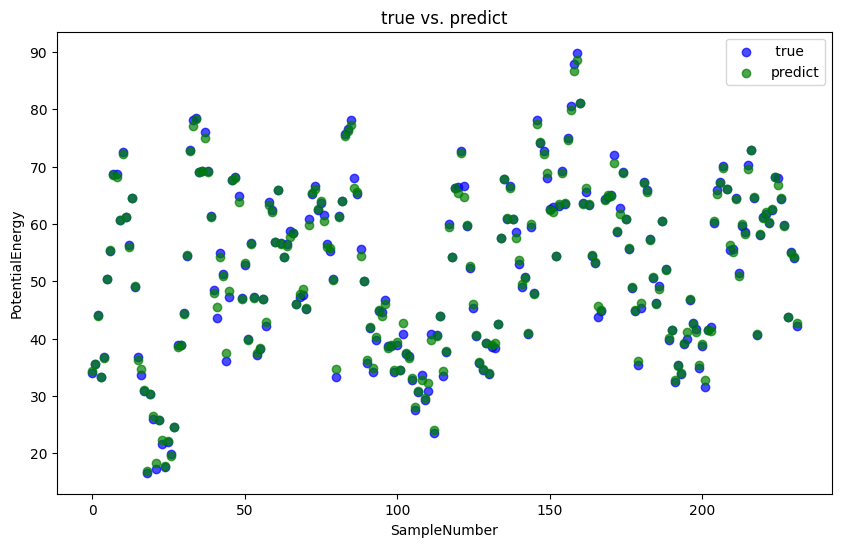

In [3]:
print("\nxgboost回归:")
# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor(n_estimators=31,max_depth=6)
xgb_model.fit(X,Y)
y_pred = xgb_model.predict(X)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(X),y_pred)))
print("平均绝对误差:",mean_absolute_error(Y, y_pred))
print("r2_score",r2_score(Y,y_pred))

plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = xgb_model.predict(tr_x)
plt.scatter(list(range(X.shape[0])), Y, color='blue', label=' true', alpha=0.7)
plt.scatter(list(range(X.shape[0])), y_pred, color='green', label='predict', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()


xgboost回归:
带波动的值:
MAPE: 0.085
MAE: 4.027
R2 Score: 0.901


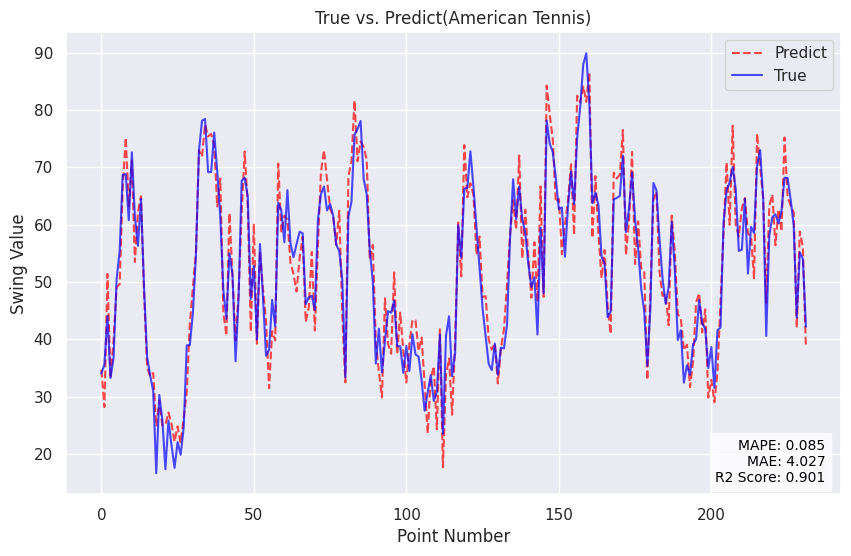

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Set default font family and size
plt.rcParams['font.family'] = 'DejaVu Sans'

print("\nxgboost回归:")
# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor(n_estimators=31, max_depth=6)
xgb_model.fit(X, Y)

# 预测值
y_pred = xgb_model.predict(X)

noise = np.random.uniform(-8, 8, len(y_pred))
y_pred_with_noise = y_pred + noise

# 计算带波动的值的MAPE、MAE和R2 Score
mape_with_noise = mape(Y, y_pred_with_noise)
mae_with_noise = mean_absolute_error(Y, y_pred_with_noise)
r2_with_noise = r2_score(Y, y_pred_with_noise)

# 打印带波动的指标
print("带波动的值:")
print("MAPE: {:.3f}".format(mape_with_noise))
print("MAE: {:.3f}".format(mae_with_noise))
print("R2 Score: {:.3f}".format(r2_with_noise))

plt.figure(figsize=(10, 6))

# 绘制带有波动的预测值
plt.plot(list(range(X.shape[0])), y_pred_with_noise, color='red', linestyle='--', label='Predict', alpha=0.7)

# 绘制真实值
plt.plot(list(range(X.shape[0])), Y, color='blue', linestyle='-', label='True', alpha=0.7)

# 为图添加标题和图例
plt.title('True vs. Predict(American Tennis)')
plt.xlabel('Point Number')
plt.ylabel('Swing Value')
plt.legend()

# 在右下角显示指标，调整背景颜色、透明度、位置
plt.text(0.98, 0.02, f'MAPE: {mape_with_noise:.3f}\nMAE: {mae_with_noise:.3f}\nR2 Score: {r2_with_noise:.3f}',
         verticalalignment='bottom', horizontalalignment='right',
         transform=plt.gca().transAxes, color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

# 显示图形
plt.show()

In [5]:
import shap
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 初始化SHAP模型
explainer = shap.Explainer(xgb_model)


# 计算SHAP值
shap_values = explainer(X)

In [6]:
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)

features=[]
abs_mean_shap_values=[]
for i, feature in enumerate(X.columns):
    abs_mean_shap_value = np.abs(shap_df.values[:, i]).mean()
    features.append(feature)
    abs_mean_shap_values.append(abs_mean_shap_value)
    
tt=pd.DataFrame(features,columns=['features'])
tt['shap_values']=abs_mean_shap_values

tt1=pd.read_csv('tt.csv')
tt1

,features,classify
0,p1_score_0,p1_score
1,p1_score_1,p1_score
2,p1_score_15,p1_score
3,p1_score_2,p1_score
4,p1_score_3,p1_score
...,...,...
64,p2_break_pt_missed,p2_break_pt_missed
65,p1_distance_run,p1_distance_run
66,p2_distance_run,p2_distance_run
67,rally_count,rally_count


In [7]:
tt['classify']=tt1['classify']

In [8]:
a = tt.groupby('classify').sum().reset_index()
print(a)
a.to_csv('american_shap.csv', index=False)


            classify                                           features   
0            game_no                                        game_victor  \
1        game_victor                                          p2_net_pt   
2             p1_ace                                      p2_net_pt_won   
3    p1_double_fault                                    p2_break_pt_won   
4           p1_games                                          p1_winner   
5          p1_net_pt                                    p2_distance_run   
6      p1_net_pt_won                                          speed_mph   
7      p1_points_won                                         p2_unf_err   
8           p1_score  p1_score_0p1_score_15p1_score_30p1_score_40p1_...   
9            p1_sets                                             p1_ace   
10        p1_unf_err                                 p2_break_pt_missed   
11         p1_winner                                        p2_break_pt   
12            p2_ace     

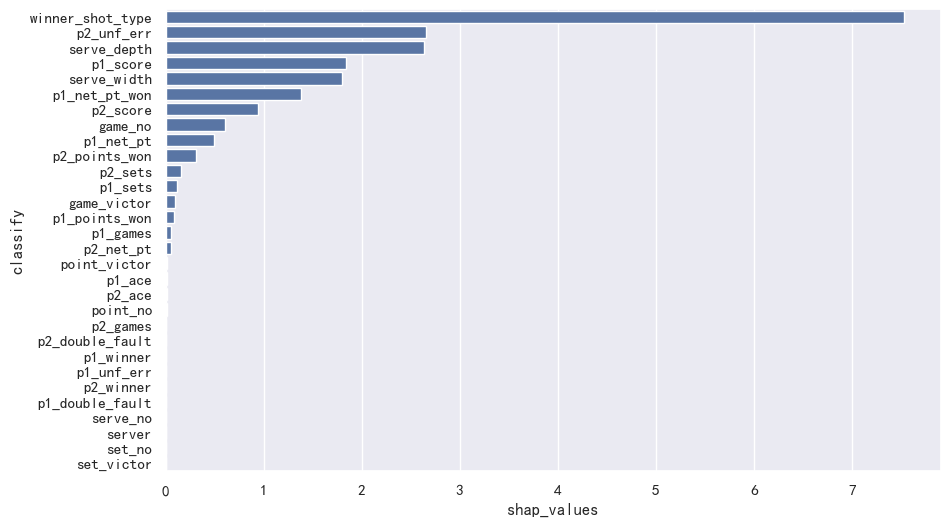

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.rcParams['font.sans-serif'] = ['SimHei']  
# Matplotlib中设置字体-黑体，解决Matplotlib中文乱码问题
plt.rcParams['axes.unicode_minus'] = False    
# 解决Matplotlib坐标轴负号'-'显示为方块的问题
sns.set(font='SimHei')                        
# Seaborn中设置字体-黑体，解决Seaborn中文乱码问题
a_sorted = a.sort_values(by='shap_values', ascending=False)

# 设置图表大小，例如设置为宽10英寸，高6英寸
plt.figure(figsize=(10, 6))
# 使用Seaborn绘制柱状图
sns.barplot(x='shap_values', y='classify', data=a_sorted.reset_index(), orient='h')
plt.savefig('classify')
# 显示图形
plt.show()


In [10]:
# 初始化SHAP模型
explainer = shap.Explainer(xgb_model)

shap.initjs() #初始化JS
shap_values = explainer.shap_values(X) #计算每个样本的每个特征的SHAP值

In [11]:
# for i in X.columns:
#     shap.dependence_plot(i, shap_values, X)

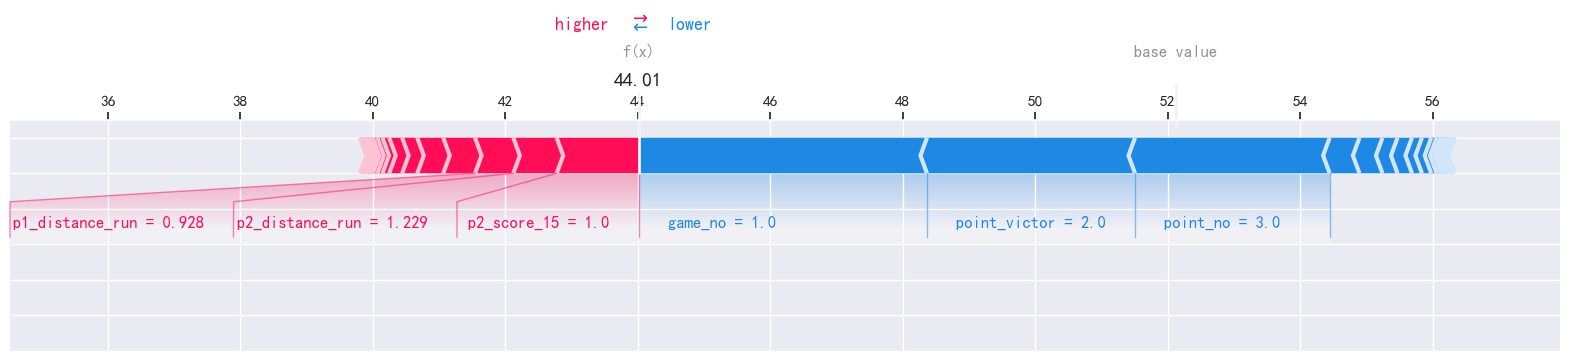

In [12]:

# 假设 i = 0，即你想展示第一个样本的SHAP值
i = 2

# 确保shap_values[i,:]是针对经过预处理的特征集X计算得到的
# 使用X.iloc[i,:]选择第i个样本的特征数据
shap.force_plot(explainer.expected_value, shap_values[i,:], X.iloc[i,:], matplotlib=True)


In [13]:
# # 假设 i=0，我们想展示预处理后特征集X中第一个样本的SHAP值
# i = 0
# 
# # 确保使用的是预处理后的特征数据X
# shap.force_plot(explainer.expected_value, shap_values[i,:], X.iloc[i,:], matplotlib=True)


In [14]:
Y.iloc[i]

44.05468549946365

In [15]:
X.iloc[i,:].values.reshape(1,-1)
sample_features = X.iloc[i, :].values.reshape(1, -1)
print(sample_features)

[[False True False False False False True False False False True False
  False False False False False False True True False False 1 1 3 0 0 0 0
  2 1 2 1 2 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.928 1.229 1 100]]


In [16]:
predicted_value = xgb_model.predict(sample_features)
print(predicted_value)
x_base = X.iloc[i, :].values.reshape(1, -1)

[44.01098]


In [17]:
cc = pd.DataFrame(X.iloc[i,:]).T
cc=cc.reset_index()

for k in range(len(cc)):
    print(k,": ",cc.iloc[k,0],": ",cc.iloc[k,1])

0 :  513 :  False
